<a href="https://colab.research.google.com/github/MartinFarres/HalloweenCandy-Heirarchical-Clustering/blob/main/candy_Heirarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Candy Heirarchical Clustering

## Load, Info and Preprocesing ( Standarization ) Data

In [26]:
import pandas as pd

df_candy = pd.read_csv('candy-data.csv')

In [28]:
display(df_candy.head())
display(df_candy.info())

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


None

In [29]:
from sklearn.preprocessing import StandardScaler

df_numeric = df_candy.drop('competitorname', axis=1)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

display(df_scaled.head())

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1.138990,-0.899172,2.251983,-0.444053,-0.299572,3.338092,-0.46291,1.745743,-1.03594,0.901261,1.376914,1.138603
1,1.138990,-0.899172,-0.444053,-0.444053,3.338092,-0.299572,-0.46291,1.745743,-1.03594,0.445922,0.148273,1.181755
2,-0.877971,-0.899172,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,-1.663576,-1.242308,-1.234361
3,-0.877971,-0.899172,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,-1.663576,0.148273,-0.287147
4,-0.877971,1.112134,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,1.520236,0.148273,0.138417


## Hierarchical clustering



In [30]:
from scipy.cluster.hierarchy import linkage

linked = linkage(df_scaled, method='ward')

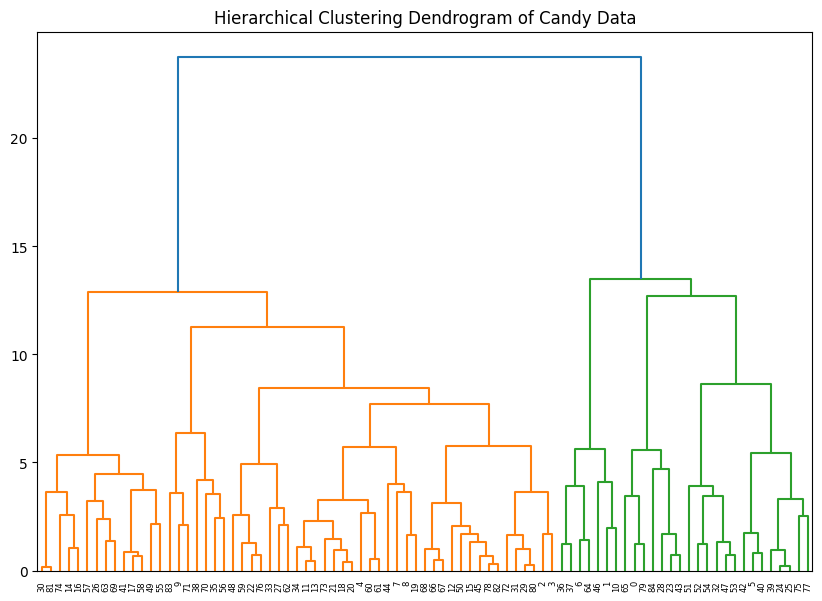

In [31]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram of Candy Data")
plt.show()

## Analyze the results



In [32]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 4
clusters = fcluster(linked, num_clusters, criterion='maxclust')

df_candy['cluster'] = clusters

display(df_candy.head())

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,4
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,3
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,2
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,2
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2


In [34]:
cluster_means = df_candy.groupby('cluster')[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']].mean()
display(cluster_means)

for cluster_id in sorted(df_candy['cluster'].unique()):
    print(f"\nCluster {cluster_id} Characteristics:")
    cluster_df = df_candy[df_candy['cluster'] == cluster_id]
    display(cluster_df[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']].mean().sort_values(ascending=False))

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
cluster,,,,,,,,,,,,
1,0.071429,0.928571,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.571429,0.559286,0.322643,40.409316
2,0.209302,0.581395,0.162791,0.023256,0.0,0.000000,0.023256,0.023256,0.744186,0.418302,0.373488,45.172858
3,0.857143,0.000000,0.571429,0.428571,1.0,0.000000,0.000000,1.000000,0.000000,0.594143,0.614143,60.051879
4,1.000000,0.000000,0.142857,0.476190,0.0,0.333333,0.000000,0.619048,0.190476,0.509952,0.713286,64.209450



Cluster 1 Characteristics:


,0
hard,1.000000
fruity,0.928571
pluribus,0.571429
chocolate,0.071429
caramel,0.000000
nougat,0.000000
peanutyalmondy,0.000000
crispedricewafer,0.000000
bar,0.000000



Cluster 2 Characteristics:


,0
pluribus,0.744186
fruity,0.581395
chocolate,0.209302
caramel,0.162791
peanutyalmondy,0.023256
bar,0.023256
hard,0.023256
nougat,0.000000
crispedricewafer,0.000000



Cluster 3 Characteristics:


,0
nougat,1.000000
bar,1.000000
chocolate,0.857143
caramel,0.571429
peanutyalmondy,0.428571
fruity,0.000000
crispedricewafer,0.000000
hard,0.000000
pluribus,0.000000



Cluster 4 Characteristics:


,0
chocolate,1.000000
bar,0.619048
peanutyalmondy,0.476190
crispedricewafer,0.333333
pluribus,0.190476
caramel,0.142857
fruity,0.000000
nougat,0.000000
hard,0.000000


## Consider pca


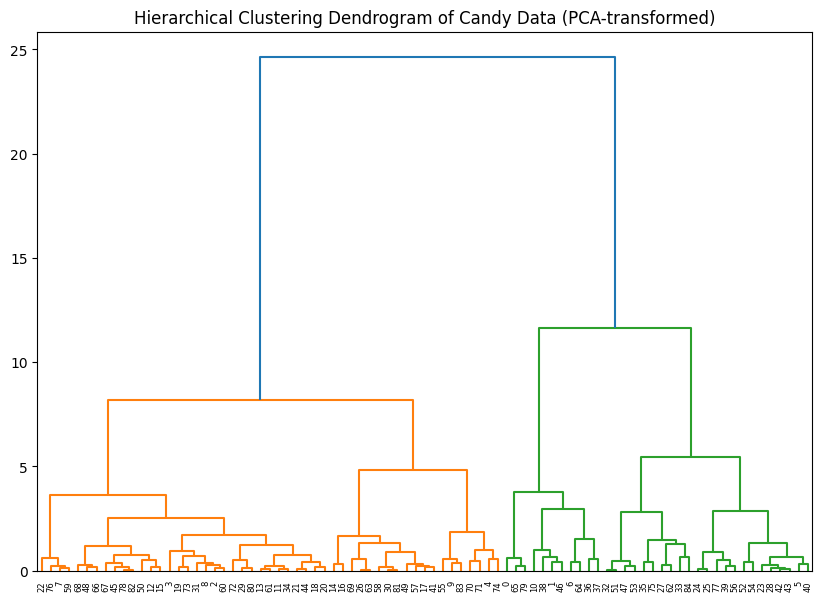

In [35]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Perform hierarchical clustering on PCA-transformed data
linked_pca = linkage(df_pca, method='ward')

# Visualize the clusters using a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked_pca)
plt.title("Hierarchical Clustering Dendrogram of Candy Data (PCA-transformed)")
plt.show()

In [36]:
from scipy.cluster.hierarchy import fcluster

# Based on visual inspection of the PCA dendrogram, let's choose 4 clusters again for comparison.
num_clusters_pca = 4
clusters_pca = fcluster(linked_pca, num_clusters_pca, criterion='maxclust')

df_candy['cluster_pca'] = clusters_pca

display(df_candy.head())

# Analyze and interpret the characteristics of the clusters formed after PCA
cluster_means_pca = df_candy.groupby('cluster_pca')[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']].mean()
display(cluster_means_pca)

for cluster_id_pca in sorted(df_candy['cluster_pca'].unique()):
    print(f"\nPCA Cluster {cluster_id_pca} Characteristics:")
    cluster_df_pca = df_candy[df_candy['cluster_pca'] == cluster_id_pca]
    display(cluster_df_pca[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']].mean().sort_values(ascending=False))

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster,cluster_pca
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,4,3
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,3,3
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,2,1
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,2,1
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2,2


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
cluster_pca,,,,,,,,,,,,
1,0.093750,0.718750,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.812500,0.359125,0.296750,43.787068
2,0.052632,0.789474,0.210526,0.000000,0.000000,0.000000,0.789474,0.000000,0.473684,0.574158,0.353263,40.008548
3,0.909091,0.000000,0.727273,0.363636,0.636364,0.272727,0.000000,1.000000,0.000000,0.636909,0.688727,62.987308
4,1.000000,0.000000,0.086957,0.391304,0.000000,0.173913,0.000000,0.434783,0.391304,0.490348,0.698739,61.857215



PCA Cluster 1 Characteristics:


,0
pluribus,0.81250
fruity,0.71875
chocolate,0.09375
peanutyalmondy,0.03125
caramel,0.00000
nougat,0.00000
crispedricewafer,0.00000
hard,0.00000
bar,0.00000



PCA Cluster 2 Characteristics:


,0
fruity,0.789474
hard,0.789474
pluribus,0.473684
caramel,0.210526
chocolate,0.052632
nougat,0.000000
peanutyalmondy,0.000000
crispedricewafer,0.000000
bar,0.000000



PCA Cluster 3 Characteristics:


,0
bar,1.000000
chocolate,0.909091
caramel,0.727273
nougat,0.636364
peanutyalmondy,0.363636
crispedricewafer,0.272727
fruity,0.000000
hard,0.000000
pluribus,0.000000



PCA Cluster 4 Characteristics:


,0
chocolate,1.000000
bar,0.434783
peanutyalmondy,0.391304
pluribus,0.391304
crispedricewafer,0.173913
caramel,0.086957
fruity,0.000000
nougat,0.000000
hard,0.000000


## Results

In [49]:
from sklearn.metrics import silhouette_score

silhouette_ward = silhouette_score(df_scaled, clusters)
silhouette_ward_pca = silhouette_score(df_pca, clusters_pca)

print("Comparison of Clustering Results (without PCA vs. with PCA):")
print(f"\nSilhouette score without PCA (Ward linkage): {silhouette_ward:.4f}")
print(f"Silhouette score with PCA (Ward linkage): {silhouette_ward_pca:.4f}")

print("\nCluster Means (without PCA):")
display(cluster_means)
print("\nCluster Means (with PCA):")
display(cluster_means_pca)

Comparison of Clustering Results (without PCA vs. with PCA):

Silhouette score without PCA (Ward linkage): 0.2137
Silhouette score with PCA (Ward linkage): 0.4718

Cluster Means (without PCA):


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
cluster,,,,,,,,,,,,
1,0.071429,0.928571,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.571429,0.559286,0.322643,40.409316
2,0.209302,0.581395,0.162791,0.023256,0.0,0.000000,0.023256,0.023256,0.744186,0.418302,0.373488,45.172858
3,0.857143,0.000000,0.571429,0.428571,1.0,0.000000,0.000000,1.000000,0.000000,0.594143,0.614143,60.051879
4,1.000000,0.000000,0.142857,0.476190,0.0,0.333333,0.000000,0.619048,0.190476,0.509952,0.713286,64.209450



Cluster Means (with PCA):


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
cluster_pca,,,,,,,,,,,,
1,0.093750,0.718750,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.812500,0.359125,0.296750,43.787068
2,0.052632,0.789474,0.210526,0.000000,0.000000,0.000000,0.789474,0.000000,0.473684,0.574158,0.353263,40.008548
3,0.909091,0.000000,0.727273,0.363636,0.636364,0.272727,0.000000,1.000000,0.000000,0.636909,0.688727,62.987308
4,1.000000,0.000000,0.086957,0.391304,0.000000,0.173913,0.000000,0.434783,0.391304,0.490348,0.698739,61.857215


## Hierarchical clustering with different linkages (without pca)




In [39]:
from sklearn.cluster import AgglomerativeClustering

linkage_methods = ['single', 'complete', 'average']
cluster_labels = {}

for linkage_method in linkage_methods:
    agg_clustering = AgglomerativeClustering(n_clusters=4, linkage=linkage_method)
    labels = agg_clustering.fit_predict(df_scaled)
    cluster_labels[linkage_method] = labels

display(cluster_labels)

{'single': array([1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1,
        2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3]),
 'complete': array([2, 0, 1, 1, 3, 0, 0, 1, 3, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1,
        1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 0, 3, 3, 3, 0, 0, 3, 0, 0, 1, 0, 2,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 3, 1, 1, 1, 3, 3, 3, 1, 0, 2,
        1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 0, 1, 2, 1, 1, 1, 1, 3]),
 'average': array([2, 3, 1, 1, 1, 0, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 3, 3, 0, 0, 0, 1, 0, 2,
        1, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 3, 2,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2])}

## Analyze and compare results (without pca)




In [46]:
from sklearn.metrics import silhouette_score

silhouette_scores = {}
for method, labels in cluster_labels.items():
    score = silhouette_score(df_scaled, labels)
    silhouette_scores[method] = score
    print(f"Silhouette score for {method} linkage: {score:.4f}")

best_method = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest linkage method based on silhouette score: {best_method}")

Silhouette score for single linkage: 0.2539
Silhouette score for complete linkage: 0.1590
Silhouette score for average linkage: 0.3013

Best linkage method based on silhouette score: average


## Hierarchical clustering with different linkages (with pca)


In [41]:
linkage_methods_pca = ['single', 'complete', 'average']
cluster_labels_pca = {}

for linkage_method in linkage_methods_pca:
    agg_clustering_pca = AgglomerativeClustering(n_clusters=4, linkage=linkage_method)
    labels_pca = agg_clustering_pca.fit_predict(df_pca)
    cluster_labels_pca[linkage_method] = labels_pca

display(cluster_labels_pca)

{'single': array([3, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]),
 'complete': array([2, 2, 0, 3, 0, 1, 2, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        3, 1, 1, 1, 0, 3, 1, 0, 0, 0, 1, 1, 0, 3, 2, 2, 2, 1, 1, 0, 1, 1,
        0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 3, 0, 2, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 2, 0, 0, 0, 0, 1]),
 'average': array([0, 0, 1, 3, 1, 2, 0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        3, 2, 2, 2, 1, 3, 2, 1, 1, 1, 2, 3, 1, 3, 0, 0, 0, 2, 2, 1, 2, 2,
        1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 1, 1, 3, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 0, 1, 1, 1, 1, 2])}

## Analyze and compare results (with pca)




In [42]:
from sklearn.metrics import silhouette_score

silhouette_scores_pca = {}
for method, labels in cluster_labels_pca.items():
    score = silhouette_score(df_pca, labels)
    silhouette_scores_pca[method] = score
    print(f"Silhouette score for {method} linkage (PCA-transformed data): {score:.4f}")

best_method_pca = max(silhouette_scores_pca, key=silhouette_scores_pca.get)
print(f"\nBest linkage method for PCA-transformed data based on silhouette score: {best_method_pca}")

Silhouette score for single linkage (PCA-transformed data): 0.3456
Silhouette score for complete linkage (PCA-transformed data): 0.4097
Silhouette score for average linkage (PCA-transformed data): 0.4261

Best linkage method for PCA-transformed data based on silhouette score: average


## Results (without pca vs. with pca)



In [45]:
print(f"Best silhouette score without PCA ('average' linkage): {silhouette_scores['average']:.4f}")
print(f"Best silhouette score with PCA ('average' linkage): {silhouette_scores_pca['average']:.4f}")

print("\nCluster characteristics without PCA ('average' linkage):")
display(cluster_means.loc[df_candy.groupby('cluster')['winpercent'].mean().sort_values(ascending=False).index].T)

print("\nCluster characteristics with PCA ('average' linkage):")

display(cluster_means_pca.loc[df_candy.groupby('cluster_pca')['winpercent'].mean().sort_values(ascending=False).index].T)


Best silhouette score without PCA ('average' linkage): 0.3013
Best silhouette score with PCA ('average' linkage): 0.4261

Cluster characteristics without PCA ('average' linkage):


cluster,4,3,2,1
chocolate,1.000000,0.857143,0.209302,0.071429
fruity,0.000000,0.000000,0.581395,0.928571
caramel,0.142857,0.571429,0.162791,0.000000
peanutyalmondy,0.476190,0.428571,0.023256,0.000000
nougat,0.000000,1.000000,0.000000,0.000000
crispedricewafer,0.333333,0.000000,0.000000,0.000000
hard,0.000000,0.000000,0.023256,1.000000
bar,0.619048,1.000000,0.023256,0.000000
pluribus,0.190476,0.000000,0.744186,0.571429
sugarpercent,0.509952,0.594143,0.418302,0.559286



Cluster characteristics with PCA ('average' linkage):


cluster_pca,3,4,1,2
chocolate,0.909091,1.000000,0.093750,0.052632
fruity,0.000000,0.000000,0.718750,0.789474
caramel,0.727273,0.086957,0.000000,0.210526
peanutyalmondy,0.363636,0.391304,0.031250,0.000000
nougat,0.636364,0.000000,0.000000,0.000000
crispedricewafer,0.272727,0.173913,0.000000,0.000000
hard,0.000000,0.000000,0.000000,0.789474
bar,1.000000,0.434783,0.000000,0.000000
pluribus,0.000000,0.391304,0.812500,0.473684
sugarpercent,0.636909,0.490348,0.359125,0.574158


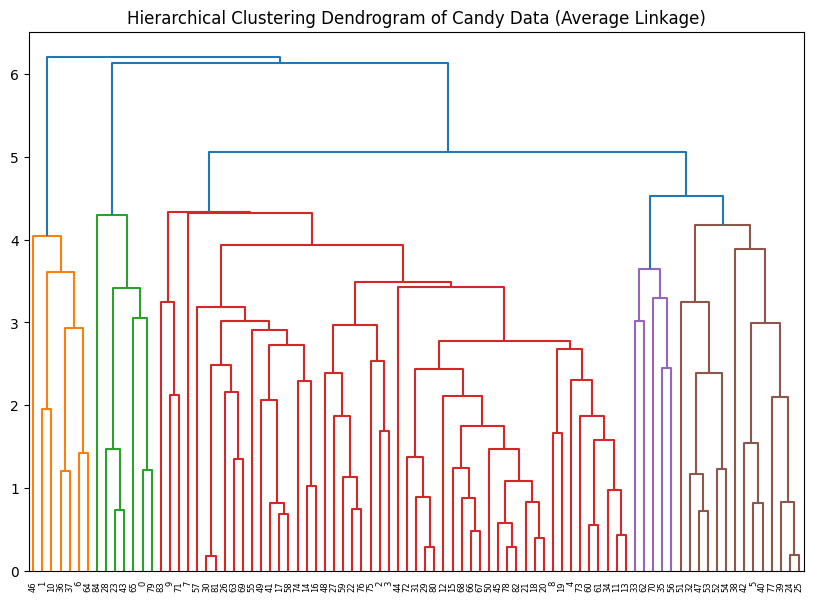

In [47]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Dendrogram for 'average' linkage without PCA
linked_average = linkage(df_scaled, method='average')

plt.figure(figsize=(10, 7))
dendrogram(linked_average)
plt.title("Hierarchical Clustering Dendrogram of Candy Data (Average Linkage)")
plt.show()

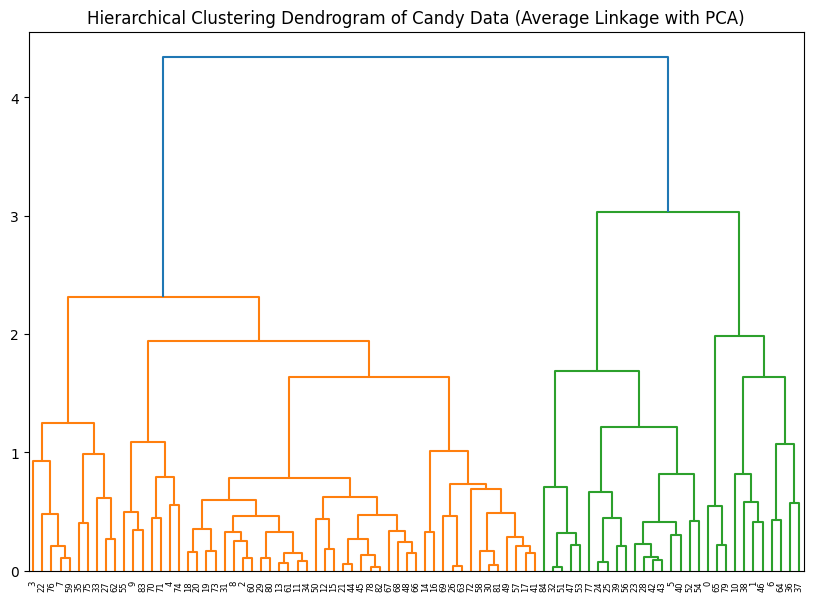

In [48]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Dendrogram for 'average' linkage with PCA
linked_average_pca = linkage(df_pca, method='average')

plt.figure(figsize=(10, 7))
dendrogram(linked_average_pca)
plt.title("Hierarchical Clustering Dendrogram of Candy Data (Average Linkage with PCA)")
plt.show()